In [3]:
import re
from collections import defaultdict


eval_single_layer = '''
              precision    recall  f1-score   support
         HOE     0.2148    0.1348    0.1656       690
         LOC     0.3781    0.2541    0.3040       665
         PER     0.2571    0.2981    0.2761       426
         DAT     0.2458    0.3816    0.2990       304
         ORG     0.1355    0.1210    0.1279       347
         COM     0.0000    0.0000    0.0000        45
         RES     0.0000    0.0000    0.0000        77
         NAM     0.0000    0.0000    0.0000        52
weighted avg     0.2421    0.2099    0.2184      2606
              precision    recall  f1-score   support
         HOE     0.2350    0.2333    0.2342       690
         LOC     0.5833    0.4211    0.4891       665
         ORG     0.2157    0.2853    0.2457       347
         PER     0.3687    0.3263    0.3462       426
         DAT     0.7468    0.5822    0.6543       304
         COM     0.0233    0.0444    0.0305        45
         RES     0.3396    0.2338    0.2769        77
         NAM     0.0000    0.0000    0.0000        52
weighted avg     0.3976    0.3361    0.3612      2606
              precision    recall  f1-score   support
         HOE     0.2805    0.2768    0.2786       690
         LOC     0.5909    0.5083    0.5465       665
         PER     0.4106    0.3451    0.3750       426
         ORG     0.4207    0.3285    0.3689       347
         DAT     0.7202    0.5757    0.6399       304
         RES     0.3455    0.2468    0.2879        77
         COM     0.0588    0.0444    0.0506        45
         NAM     0.1053    0.0385    0.0563        52
weighted avg     0.4455    0.3791    0.4088      2606
              precision    recall  f1-score   support
         HOE     0.4259    0.3667    0.3941       690
         LOC     0.7247    0.5383    0.6178       665
         PER     0.6067    0.4671    0.5279       426
         ORG     0.4186    0.3631    0.3889       347
         DAT     0.8155    0.6250    0.7076       304
         RES     0.4902    0.3247    0.3906        77
         COM     0.3750    0.2667    0.3117        45
         NAM     0.3529    0.1154    0.1739        52
weighted avg     0.5757    0.4486    0.5030      2606
              precision    recall  f1-score   support
         HOE     0.5040    0.3652    0.4235       690
         LOC     0.6950    0.5414    0.6086       665
         PER     0.6269    0.4812    0.5445       426
         ORG     0.4621    0.3862    0.4207       347
         DAT     0.7930    0.6678    0.7250       304
         RES     0.3784    0.3636    0.3709        77
         COM     0.4255    0.4444    0.4348        45
         NAM     0.6111    0.2115    0.3143        52
weighted avg     0.5980    0.4655    0.5218      2606
              precision    recall  f1-score   support
         HOE     0.4629    0.3435    0.3943       690
         LOC     0.7353    0.5850    0.6516       665
         PER     0.5589    0.4789    0.5158       426
         ORG     0.5759    0.4265    0.4901       347
         DAT     0.8223    0.6546    0.7289       304
         RES     0.5763    0.4416    0.5000        77
         COM     0.5625    0.4000    0.4675        45
         NAM     0.5000    0.1923    0.2778        52
weighted avg     0.6109    0.4754    0.5337      2606
              precision    recall  f1-score   support
         LOC     0.7346    0.5744    0.6447       665
         HOE     0.5320    0.3739    0.4391       690
         PER     0.5983    0.5070    0.5489       426
         ORG     0.5387    0.4207    0.4725       347
         DAT     0.8147    0.6941    0.7496       304
         RES     0.5532    0.3377    0.4194        77
         NAM     0.3600    0.1731    0.2338        52
         COM     0.6774    0.4667    0.5526        45
weighted avg     0.6281    0.4870    0.5475      2606
              precision    recall  f1-score   support
         LOC     0.7646    0.5910    0.6667       665
         HOE     0.5563    0.3870    0.4564       690
         PER     0.5625    0.5282    0.5448       426
         ORG     0.5911    0.4582    0.5162       347
         DAT     0.7411    0.6875    0.7133       304
         RES     0.6271    0.4805    0.5441        77
         COM     0.7812    0.5556    0.6494        45
         NAM     0.5909    0.2500    0.3514        52
weighted avg     0.6433    0.5096    0.5663      2606
              precision    recall  f1-score   support
         LOC     0.6957    0.5774    0.6311       665
         HOE     0.5462    0.4029    0.4637       690
         PER     0.6517    0.5094    0.5718       426
         ORG     0.5747    0.5101    0.5405       347
         DAT     0.8014    0.7697    0.7852       304
         RES     0.6000    0.4675    0.5255        77
         NAM     0.4286    0.2308    0.3000        52
         COM     0.6875    0.4889    0.5714        45
weighted avg     0.6368    0.5219    0.5722      2606
              precision    recall  f1-score   support
         HOE     0.5284    0.4043    0.4581       690
         LOC     0.7052    0.5865    0.6404       665
         PER     0.6401    0.5469    0.5899       426
         ORG     0.6403    0.5130    0.5696       347
         DAT     0.8631    0.7467    0.8007       304
         RES     0.6032    0.4935    0.5429        77
         NAM     0.4615    0.2308    0.3077        52
         COM     0.6774    0.4667    0.5526        45
weighted avg     0.6492    0.5288    0.5821      2606
'''

data = {
    'layer': [],
    'set_size': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}
eval_lines = eval_single_layer.split('\n')
layer_scores = defaultdict(list)
for eval_line in eval_lines:
    if m := re.search(r'.*(HOE|LOC|PER|DAT|ORG|COM|RES|NAM|avg).*?(0.\d{4}).*?(0.\d{4}).*?(0.\d{4})', eval_line):
        layer = m.group(1)
        f1 = m.group(4)
        data['layer'].append(layer)
        data['set_size'].append(data['layer'].count('HOE') * 130)
        data['Precision'].append(float(m.group(2)))
        data['Recall'].append(float(m.group(3)))
        data['F1'].append(float(f1))
        layer_scores[layer].append(f1)


In [4]:
import pandas as pd

layer_map = {
    'HOE': 'Hoedanigheid',
    'PER': 'Persoonsnaam',
    'ORG': 'Organisatie',
    'LOC': 'Locatie',
    'DAT': 'Datum',
    'RES': 'Resolutieref.',
    'COM': 'Commissie',
    'NAM': 'Overige namen',
    'avg': 'Total'
}


df = pd.DataFrame(data)
df['layer'] = df.layer.apply(lambda x: layer_map[x])

df

,layer,set_size,Precision,Recall,F1
0,Hoedanigheid,130,0.2148,0.1348,0.1656
1,Locatie,130,0.3781,0.2541,0.3040
2,Persoonsnaam,130,0.2571,0.2981,0.2761
3,Datum,130,0.2458,0.3816,0.2990
4,Organisatie,130,0.1355,0.1210,0.1279
...,...,...,...,...,...
85,Datum,1300,0.8631,0.7467,0.8007
86,Resolutieref.,1300,0.6032,0.4935,0.5429
87,Overige namen,1300,0.4615,0.2308,0.3077
88,Commissie,1300,0.6774,0.4667,0.5526


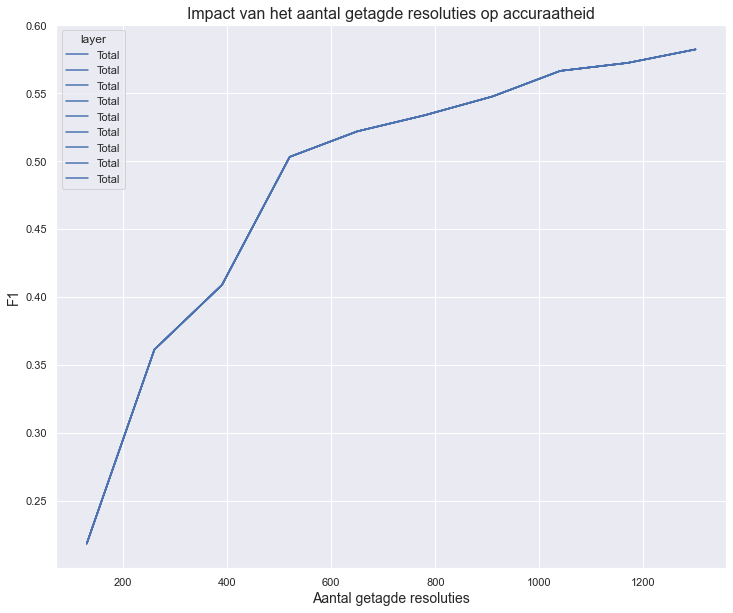

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

image_dir = '/Users/marijnkoolen/writing/Humanities-Cluster/Projects/REPUBLIC/Presentaties/Tag-de-Besluiten-2023-04-26'

fig, ax = plt.subplots(1,1)

for layer in layer_scores:
    sns.lineplot(data=df[df.layer == 'Total'], x='set_size', y='F1', hue='layer', ax=ax)
    
fig.set_size_inches(12, 10)
ax.set_xlabel('Aantal getagde resoluties', fontsize=14);
ax.set_ylabel('F1', fontsize=14);
ax.set_title('Impact van het aantal getagde resoluties op accuraatheid', fontsize=16);

fig.savefig(f'{image_dir}/impact_trainig_set_size.png', dpi=150)


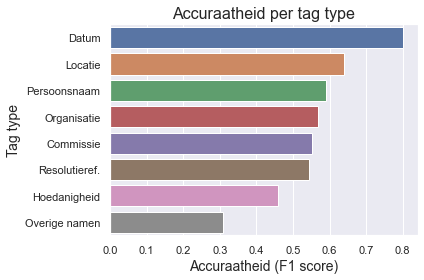

In [6]:
final = df[df.set_size == df.set_size.max()].sort_values('F1', ascending=False)

final = final[final.layer != 'Total']
ax = sns.barplot(data=final[final.set_size == final.set_size.max()], y='layer', x='F1');

ax.set_xlabel('Accuraatheid (F1 score)', fontsize=14);
ax.set_ylabel('Tag type', fontsize=14);
ax.set_title('Accuraatheid per tag type', fontsize=16);

ax.figure.tight_layout()

ax.figure.savefig(f'{image_dir}/evaluation_per_tag_type_F1.png', dpi=150)


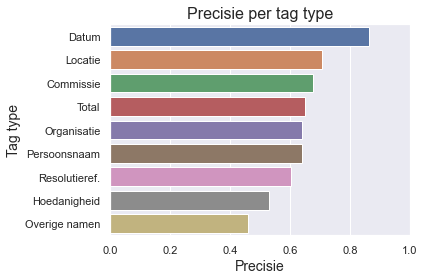

In [7]:
final = df[df.set_size == df.set_size.max()].sort_values('Precision', ascending=False)

ax = sns.barplot(data=final[final.set_size == final.set_size.max()], y='layer', x='Precision');
ax.set_xlabel('Precisie', fontsize=14);
ax.set_ylabel('Tag type', fontsize=14);
ax.set_title('Precisie per tag type', fontsize=16);
ax.set_xlim(0,1.0)

ax.figure.tight_layout()

ax.figure.savefig(f'{image_dir}/evaluation_per_tag_type_precision.png', dpi=150)


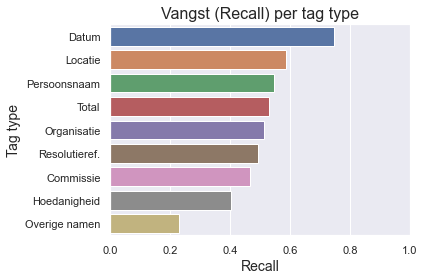

In [8]:
final = df[df.set_size == df.set_size.max()].sort_values('Recall', ascending=False)

ax = sns.barplot(data=final[final.set_size == final.set_size.max()], y='layer', x='Recall');
ax.set_xlabel('Recall', fontsize=14);
ax.set_ylabel('Tag type', fontsize=14);
ax.set_title('Vangst (Recall) per tag type', fontsize=16);
ax.set_xlim(0,1.0)

ax.figure.tight_layout()

ax.figure.savefig(f'{image_dir}/evaluation_per_tag_type_recall.png', dpi=150)


In [9]:
eval_single_layer = '''
              precision    recall  f1-score   support
         HOE     0.0585    0.0812    0.0680       690
         PER     0.0215    0.0235    0.0224       426
         LOC     0.1179    0.0346    0.0535       665
         ORG     0.0513    0.0692    0.0589       347
         DAT     0.5305    0.4572    0.4912       304
         COM     0.0000    0.0000    0.0000        45
         RES     0.0000    0.0000    0.0000        77
         NAM     0.0000    0.0000    0.0000        52
weighted avg     0.1178    0.0967    0.1005      2606
              precision    recall  f1-score   support
         HOE     0.3303    0.2667    0.2951       690
         LOC     0.5224    0.4376    0.4763       665
         PER     0.4441    0.3263    0.3762       426
         ORG     0.3729    0.2536    0.3019       347
         DAT     0.7403    0.5625    0.6393       304
         RES     0.3750    0.2338    0.2880        77
         COM     0.0820    0.1111    0.0943        45
         NAM     0.0000    0.0000    0.0000        52
weighted avg     0.4419    0.3438    0.3861      2606
              precision    recall  f1-score   support
         HOE     0.4579    0.3551    0.4000       690
         LOC     0.6047    0.5083    0.5523       665
         PER     0.5506    0.4085    0.4690       426
         ORG     0.4490    0.3170    0.3716       347
         DAT     0.7764    0.6053    0.6802       304
         RES     0.5769    0.3896    0.4651        77
         COM     0.0000    0.0000    0.0000        45
         NAM     0.7857    0.2115    0.3333        52
weighted avg     0.5486    0.4190    0.4727      2606
              precision    recall  f1-score   support
         HOE     0.5028    0.3913    0.4401       690
         LOC     0.6885    0.5383    0.6042       665
         PER     0.5881    0.4624    0.5177       426
         ORG     0.5304    0.3775    0.4411       347
         DAT     0.7901    0.6316    0.7020       304
         RES     0.5323    0.4286    0.4748        77
         COM     0.6667    0.4000    0.5000        45
         NAM     0.7857    0.2115    0.3333        52
weighted avg     0.6106    0.4643    0.5253      2606
              precision    recall  f1-score   support
         HOE     0.4760    0.4029    0.4364       690
         LOC     0.6587    0.5398    0.5934       665
         PER     0.6091    0.4718    0.5317       426
         ORG     0.5320    0.3833    0.4456       347
         DAT     0.7924    0.6151    0.6926       304
         RES     0.4921    0.4026    0.4429        77
         COM     0.5135    0.4222    0.4634        45
         NAM     0.3636    0.1538    0.2162        52
weighted avg     0.5876    0.4666    0.5194      2606
              precision    recall  f1-score   support
         LOC     0.6276    0.5474    0.5847       665
         HOE     0.5144    0.3884    0.4426       690
         PER     0.5714    0.4695    0.5155       426
         ORG     0.5477    0.3804    0.4490       347
         DAT     0.8319    0.6184    0.7094       304
         RES     0.4776    0.4156    0.4444        77
         COM     0.6786    0.4222    0.5205        45
         NAM     0.5500    0.2115    0.3056        52
weighted avg     0.5965    0.4658    0.5214      2606
              precision    recall  f1-score   support
         HOE     0.4981    0.3739    0.4272       690
         LOC     0.7059    0.5594    0.6242       665
         PER     0.6011    0.4953    0.5431       426
         ORG     0.6213    0.4207    0.5017       347
         DAT     0.8363    0.6217    0.7132       304
         RES     0.6863    0.4545    0.5469        77
         NAM     0.3158    0.1154    0.1690        52
         COM     0.7500    0.4000    0.5217        45
weighted avg     0.6301    0.4739    0.5397      2606
              precision    recall  f1-score   support
         HOE     0.5185    0.3855    0.4422       690
         LOC     0.7578    0.5504    0.6376       665
         PER     0.6494    0.5305    0.5840       426
         ORG     0.5328    0.3977    0.4554       347
         DAT     0.8297    0.6250    0.7129       304
         RES     0.6230    0.4935    0.5507        77
         COM     0.6429    0.4000    0.4932        45
         NAM     0.7222    0.2500    0.3714        52
weighted avg     0.6485    0.4816    0.5513      2606
              precision    recall  f1-score   support
         HOE     0.5404    0.4072    0.4645       690
         LOC     0.7410    0.5850    0.6538       665
         PER     0.7224    0.5070    0.5959       426
         ORG     0.6321    0.3862    0.4794       347
         DAT     0.8341    0.6283    0.7167       304
         RES     0.5625    0.4675    0.5106        77
         NAM     0.4800    0.2308    0.3117        52
         COM     0.7857    0.4889    0.6027        45
weighted avg     0.6715    0.4916    0.5664      2606
              precision    recall  f1-score   support
         HOE     0.5589    0.4333    0.4882       690
         LOC     0.8029    0.5759    0.6708       665
         PER     0.6571    0.5352    0.5899       426
         ORG     0.6637    0.4323    0.5236       347
         DAT     0.8448    0.6447    0.7313       304
         RES     0.5231    0.4416    0.4789        77
         NAM     0.5455    0.3462    0.4235        52
         COM     0.6250    0.4444    0.5195        45
'''

data = {
    'layer': [],
    'set_size': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}
eval_lines = eval_single_layer.split('\n')
layer_scores = defaultdict(list)
for eval_line in eval_lines:
    if m := re.search(r'.*(HOE|LOC|PER|DAT|ORG|COM|RES|NAM|avg).*?(0.\d{4}).*?(0.\d{4}).*?(0.\d{4})', eval_line):
        data['layer'].append(m.group(1))
        data['set_size'].append(data['layer'].count('HOE') * 130)
        data['Precision'].append(float(m.group(2)))
        data['Recall'].append(float(m.group(3)))
        data['F1'].append(float(m.group(4)))
        layer_scores[layer].append(f1)



layer_map = {
    'HOE': 'Hoedanigheid',
    'PER': 'Persoonsnaam',
    'ORG': 'Organisatie',
    'LOC': 'Locatie',
    'DAT': 'Datum',
    'RES': 'Resolutieref.',
    'COM': 'Commissie',
    'NAM': 'Overige namen',
    'avg': 'Total'
}


df = pd.DataFrame(data)
df['layer'] = df.layer.apply(lambda x: layer_map[x])

df

,layer,set_size,Precision,Recall,F1
0,Hoedanigheid,130,0.0585,0.0812,0.0680
1,Persoonsnaam,130,0.0215,0.0235,0.0224
2,Locatie,130,0.1179,0.0346,0.0535
3,Organisatie,130,0.0513,0.0692,0.0589
4,Datum,130,0.5305,0.4572,0.4912
...,...,...,...,...,...
84,Organisatie,1300,0.6637,0.4323,0.5236
85,Datum,1300,0.8448,0.6447,0.7313
86,Resolutieref.,1300,0.5231,0.4416,0.4789
87,Overige namen,1300,0.5455,0.3462,0.4235


<Axes: xlabel='set_size', ylabel='F1'>

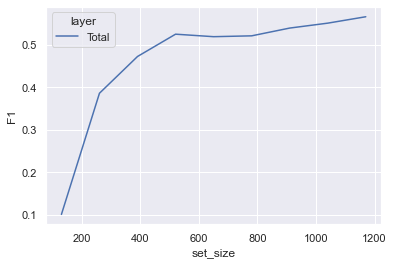

In [10]:
sns.lineplot(data=df[df.layer == 'Total'], x='set_size', y='F1', hue='layer')